https://drive.google.com/file/d/1qAdkGIFmf4vlzK8B2VdaZl5eQqTdLEMJ/view?usp=drive_link

In [ ]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#  Load Data
df = pd.read_csv('/content/Engineering_graduate_salary.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

# DATA PREPROCESSING

# New section

In [ ]:
df.shape

(2998, 34)

In [ ]:
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['Age'] = 2025 - df['DOB'].dt.year
df.drop('DOB', axis=1, inplace=True)

In [ ]:
df.drop(['CollegeID'], axis=1, inplace=True)

In [ ]:
df.drop(['10board'],axis=1,inplace=True)

In [ ]:
df.drop(['ID'],axis=1,inplace=True)

In [ ]:
df.drop(['12board'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   10percentage           2998 non-null   float64
 2   12graduation           2998 non-null   int64  
 3   12percentage           2998 non-null   float64
 4   CollegeTier            2998 non-null   int64  
 5   Degree                 2998 non-null   object 
 6   Specialization         2998 non-null   object 
 7   collegeGPA             2998 non-null   float64
 8   CollegeCityID          2998 non-null   int64  
 9   CollegeCityTier        2998 non-null   int64  
 10  CollegeState           2998 non-null   object 
 11  GraduationYear         2998 non-null   int64  
 12  English                2998 non-null   int64  
 13  Logical                2998 non-null   int64  
 14  Quant                  2998 non-null   int64  
 15  Doma

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Get all object columns
object_cols = df.select_dtypes(include='object').columns.tolist()

# (Optional) If you want to exclude 'Salary' or any target column:
# object_cols.remove('Salary')

# Apply OneHotEncoder to each object column
# Use handle_unknown='ignore' to handle potential new categories in test data
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the selected columns
encoded_data = encoder.fit_transform(df[object_cols])

# Create a DataFrame from the encoded data with appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(object_cols))

# Drop the original object columns
df = df.drop(object_cols, axis=1)

# Concatenate the original DataFrame with the new one-hot encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 100 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   10percentage                                                2998 non-null   float64
 1   12graduation                                                2998 non-null   int64  
 2   12percentage                                                2998 non-null   float64
 3   CollegeTier                                                 2998 non-null   int64  
 4   collegeGPA                                                  2998 non-null   float64
 5   CollegeCityID                                               2998 non-null   int64  
 6   CollegeCityTier                                             2998 non-null   int64  
 7   GraduationYear                                              2998 non-null   int64  
 8

In [ ]:
df.isnull().sum()

,0
10percentage,0
12graduation,0
12percentage,0
CollegeTier,0
collegeGPA,0
...,...
CollegeState_Telangana,0
CollegeState_Union Territory,0
CollegeState_Uttar Pradesh,0
CollegeState_Uttarakhand,0


In [ ]:
df.describe()

,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,77.666264,2008.080720,74.341061,1.924616,71.509857,5210.210807,0.296197,2011.939960,501.066378,500.431621,...,0.043362,0.047031,0.042028,0.000667,0.088059,0.083055,0.001668,0.232822,0.027018,0.048366
std,10.002785,1.631814,11.120299,0.264053,8.122462,4776.609877,0.456655,36.780582,105.304512,87.299850,...,0.203705,0.211741,0.200687,0.025824,0.283428,0.276012,0.040811,0.422700,0.162163,0.214573
min,43.000000,1998.000000,40.000000,1.000000,6.630000,2.000000,0.000000,0.000000,180.000000,195.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.140000,2007.000000,66.000000,2.000000,66.530000,526.250000,0.000000,2012.000000,425.000000,441.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78.965000,2008.000000,74.000000,2.000000,71.800000,4027.500000,0.000000,2013.000000,500.000000,505.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,85.600000,2009.000000,82.600000,2.000000,76.300000,8822.250000,1.000000,2014.000000,570.000000,565.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,97.760000,2012.000000,98.700000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(2998, 100)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 100 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   10percentage                                                2998 non-null   float64
 1   12graduation                                                2998 non-null   int64  
 2   12percentage                                                2998 non-null   float64
 3   CollegeTier                                                 2998 non-null   int64  
 4   collegeGPA                                                  2998 non-null   float64
 5   CollegeCityID                                               2998 non-null   int64  
 6   CollegeCityTier                                             2998 non-null   int64  
 7   GraduationYear                                              2998 non-null   int64  
 8

In [ ]:

# Rename columns with typos
df.rename(columns={'nueroticism': 'neuroticism','openess_to_experience':'openess'}, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 100 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   10percentage                                                2998 non-null   float64
 1   12graduation                                                2998 non-null   int64  
 2   12percentage                                                2998 non-null   float64
 3   CollegeTier                                                 2998 non-null   int64  
 4   collegeGPA                                                  2998 non-null   float64
 5   CollegeCityID                                               2998 non-null   int64  
 6   CollegeCityTier                                             2998 non-null   int64  
 7   GraduationYear                                              2998 non-null   int64  
 8

In [ ]:
 #Step 9: Check for duplicates
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicates: 0


In [ ]:
df.shape

(2998, 100)

In [ ]:
df.describe()

,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,77.666264,2008.080720,74.341061,1.924616,71.509857,5210.210807,0.296197,2011.939960,501.066378,500.431621,...,0.043362,0.047031,0.042028,0.000667,0.088059,0.083055,0.001668,0.232822,0.027018,0.048366
std,10.002785,1.631814,11.120299,0.264053,8.122462,4776.609877,0.456655,36.780582,105.304512,87.299850,...,0.203705,0.211741,0.200687,0.025824,0.283428,0.276012,0.040811,0.422700,0.162163,0.214573
min,43.000000,1998.000000,40.000000,1.000000,6.630000,2.000000,0.000000,0.000000,180.000000,195.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.140000,2007.000000,66.000000,2.000000,66.530000,526.250000,0.000000,2012.000000,425.000000,441.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78.965000,2008.000000,74.000000,2.000000,71.800000,4027.500000,0.000000,2013.000000,500.000000,505.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,85.600000,2009.000000,82.600000,2.000000,76.300000,8822.250000,1.000000,2014.000000,570.000000,565.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,97.760000,2012.000000,98.700000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Replace -1 with NaN in subject columns
subject_cols = [
    'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
    'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'
]
df[subject_cols] = df[subject_cols].replace(-1, np.nan)


In [ ]:
# List of subject columns again (in case not reused)
subject_cols = [
    'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
    'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'
]

# Fill NaN values with column-wise mean
df[subject_cols] = df[subject_cols].fillna(df[subject_cols].mean())


In [ ]:
print("Remaining NaNs:", df[subject_cols].isna().sum())

Remaining NaNs: ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
dtype: int64


In [ ]:
df.shape

(2998, 100)

In [ ]:
df.describe()

,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,77.666264,2008.080720,74.341061,1.924616,71.509857,5210.210807,0.296197,2011.939960,501.066378,500.431621,...,0.043362,0.047031,0.042028,0.000667,0.088059,0.083055,0.001668,0.232822,0.027018,0.048366
std,10.002785,1.631814,11.120299,0.264053,8.122462,4776.609877,0.456655,36.780582,105.304512,87.299850,...,0.203705,0.211741,0.200687,0.025824,0.283428,0.276012,0.040811,0.422700,0.162163,0.214573
min,43.000000,1998.000000,40.000000,1.000000,6.630000,2.000000,0.000000,0.000000,180.000000,195.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.140000,2007.000000,66.000000,2.000000,66.530000,526.250000,0.000000,2012.000000,425.000000,441.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78.965000,2008.000000,74.000000,2.000000,71.800000,4027.500000,0.000000,2013.000000,500.000000,505.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,85.600000,2009.000000,82.600000,2.000000,76.300000,8822.250000,1.000000,2014.000000,570.000000,565.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,97.760000,2012.000000,98.700000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(2998, 100)

In [ ]:
df.describe()

,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,77.666264,2008.080720,74.341061,1.924616,71.509857,5210.210807,0.296197,2011.939960,501.066378,500.431621,...,0.043362,0.047031,0.042028,0.000667,0.088059,0.083055,0.001668,0.232822,0.027018,0.048366
std,10.002785,1.631814,11.120299,0.264053,8.122462,4776.609877,0.456655,36.780582,105.304512,87.299850,...,0.203705,0.211741,0.200687,0.025824,0.283428,0.276012,0.040811,0.422700,0.162163,0.214573
min,43.000000,1998.000000,40.000000,1.000000,6.630000,2.000000,0.000000,0.000000,180.000000,195.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.140000,2007.000000,66.000000,2.000000,66.530000,526.250000,0.000000,2012.000000,425.000000,441.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78.965000,2008.000000,74.000000,2.000000,71.800000,4027.500000,0.000000,2013.000000,500.000000,505.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,85.600000,2009.000000,82.600000,2.000000,76.300000,8822.250000,1.000000,2014.000000,570.000000,565.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,97.760000,2012.000000,98.700000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Unique Values Per Column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

10percentage: 736 unique values
12graduation: 13 unique values
12percentage: 717 unique values
CollegeTier: 2 unique values
collegeGPA: 1064 unique values
CollegeCityID: 1173 unique values
CollegeCityTier: 2 unique values
GraduationYear: 11 unique values
English: 109 unique values
Logical: 104 unique values
Quant: 133 unique values
Domain: 221 unique values
ComputerProgramming: 76 unique values
ElectronicsAndSemicon: 29 unique values
ComputerScience: 19 unique values
MechanicalEngg: 39 unique values
ElectricalEngg: 29 unique values
TelecomEngg: 24 unique values
CivilEngg: 15 unique values
conscientiousness: 129 unique values
agreeableness: 136 unique values
extraversion: 142 unique values
neuroticism: 204 unique values
openess: 131 unique values
Salary: 165 unique values
Age: 16 unique values
Gender_f: 2 unique values
Gender_m: 2 unique values
Degree_B.Tech/B.E.: 2 unique values
Degree_M.Sc. (Tech.): 2 unique values
Degree_M.Tech./M.E.: 2 unique values
Degree_MCA: 2 unique values
Speci

In [ ]:
df.shape

(2998, 100)

In [ ]:
print(df.columns.tolist())

['10percentage', '12graduation', '12percentage', 'CollegeTier', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'neuroticism', 'openess', 'Salary', 'Age', 'Gender_f', 'Gender_m', 'Degree_B.Tech/B.E.', 'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.', 'Degree_MCA', 'Specialization_aeronautical engineering', 'Specialization_applied electronics and instrumentation', 'Specialization_automobile/automotive engineering', 'Specialization_biomedical engineering', 'Specialization_biotechnology', 'Specialization_ceramic engineering', 'Specialization_chemical engineering', 'Specialization_civil engineering', 'Specialization_computer and communication engineering', 'Specialization_computer application', 'Specialization_computer engineering', 'Specialization_co

In [ ]:
# Function to count outliers using IQR
def count_outliers_iqr(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        outlier_counts[col] = outliers
    return outlier_counts

# Get numeric columns (except ID columns)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
exclude_cols = ['ID', 'CollegeID', 'CollegeCityID']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Get outlier counts
outlier_counts = count_outliers_iqr(df, numeric_cols)

# Sort and display the top outlier-heavy columns
sorted_outliers = sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)

# Print results
print("Columns with Most Outliers:\n")
for col, count in sorted_outliers:
    print(f"{col}: {count} outliers")

Columns with Most Outliers:

ElectronicsAndSemicon: 865 outliers
Gender_f: 716 outliers
Gender_m: 716 outliers
ComputerScience: 700 outliers
CollegeState_Uttar Pradesh: 698 outliers
Specialization_electronics and communication engineering: 670 outliers
Specialization_computer science & engineering: 557 outliers
Specialization_information technology: 506 outliers
Specialization_computer engineering: 415 outliers
CollegeState_Karnataka: 281 outliers
TelecomEngg: 274 outliers
CollegeState_Tamil Nadu: 264 outliers
CollegeState_Telangana: 249 outliers
Degree_B.Tech/B.E.: 241 outliers
CollegeTier: 226 outliers
Specialization_computer application: 201 outliers
Degree_MCA: 200 outliers
CollegeState_Maharashtra: 189 outliers
MechanicalEngg: 187 outliers
Domain: 179 outliers
CollegeState_Andhra Pradesh: 172 outliers
Specialization_mechanical engineering: 155 outliers
Specialization_electronics and electrical engineering: 148 outliers
ComputerProgramming: 145 outliers
CollegeState_West Bengal: 14

In [ ]:
df.shape

(2998, 100)

In [ ]:
from scipy.stats import zscore
import numpy as np

# Columns to apply Z-score on (make sure these exist in df)
zscore_cols = [
    'Salary', 'collegeGPA', 'Quant', 'Logical', 'English',
    'openness', 'agreeableness', 'extraversion', 'conscientiousness',
    'neuroticism', '10percentage', '12percentage', 'TestScore', 'Experience'
]

# Optional: Add 'ComputerProgramming' only if it's numeric (not binary)
if df['ComputerProgramming'].nunique() > 2:
    zscore_cols.append('ComputerProgramming')

# Filter only the existing columns
zscore_cols = [col for col in zscore_cols if col in df.columns]

# Apply Z-score
z_scores = np.abs(zscore(df[zscore_cols]))

# Threshold
threshold = 3

# Keep rows with all z-scores < threshold
df_clean = df[(z_scores < threshold).all(axis=1)]

print("Before:", df.shape)
print("After Z-score outlier removal:", df_clean.shape)

Before: (2998, 100)
After Z-score outlier removal: (2847, 100)


In [ ]:
df_clean.shape

(2847, 100)

In [ ]:
df.describe()

,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,77.666264,2008.080720,74.341061,1.924616,71.509857,5210.210807,0.296197,2011.939960,501.066378,500.431621,...,0.043362,0.047031,0.042028,0.000667,0.088059,0.083055,0.001668,0.232822,0.027018,0.048366
std,10.002785,1.631814,11.120299,0.264053,8.122462,4776.609877,0.456655,36.780582,105.304512,87.299850,...,0.203705,0.211741,0.200687,0.025824,0.283428,0.276012,0.040811,0.422700,0.162163,0.214573
min,43.000000,1998.000000,40.000000,1.000000,6.630000,2.000000,0.000000,0.000000,180.000000,195.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.140000,2007.000000,66.000000,2.000000,66.530000,526.250000,0.000000,2012.000000,425.000000,441.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78.965000,2008.000000,74.000000,2.000000,71.800000,4027.500000,0.000000,2013.000000,500.000000,505.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,85.600000,2009.000000,82.600000,2.000000,76.300000,8822.250000,1.000000,2014.000000,570.000000,565.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,97.760000,2012.000000,98.700000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# EDA

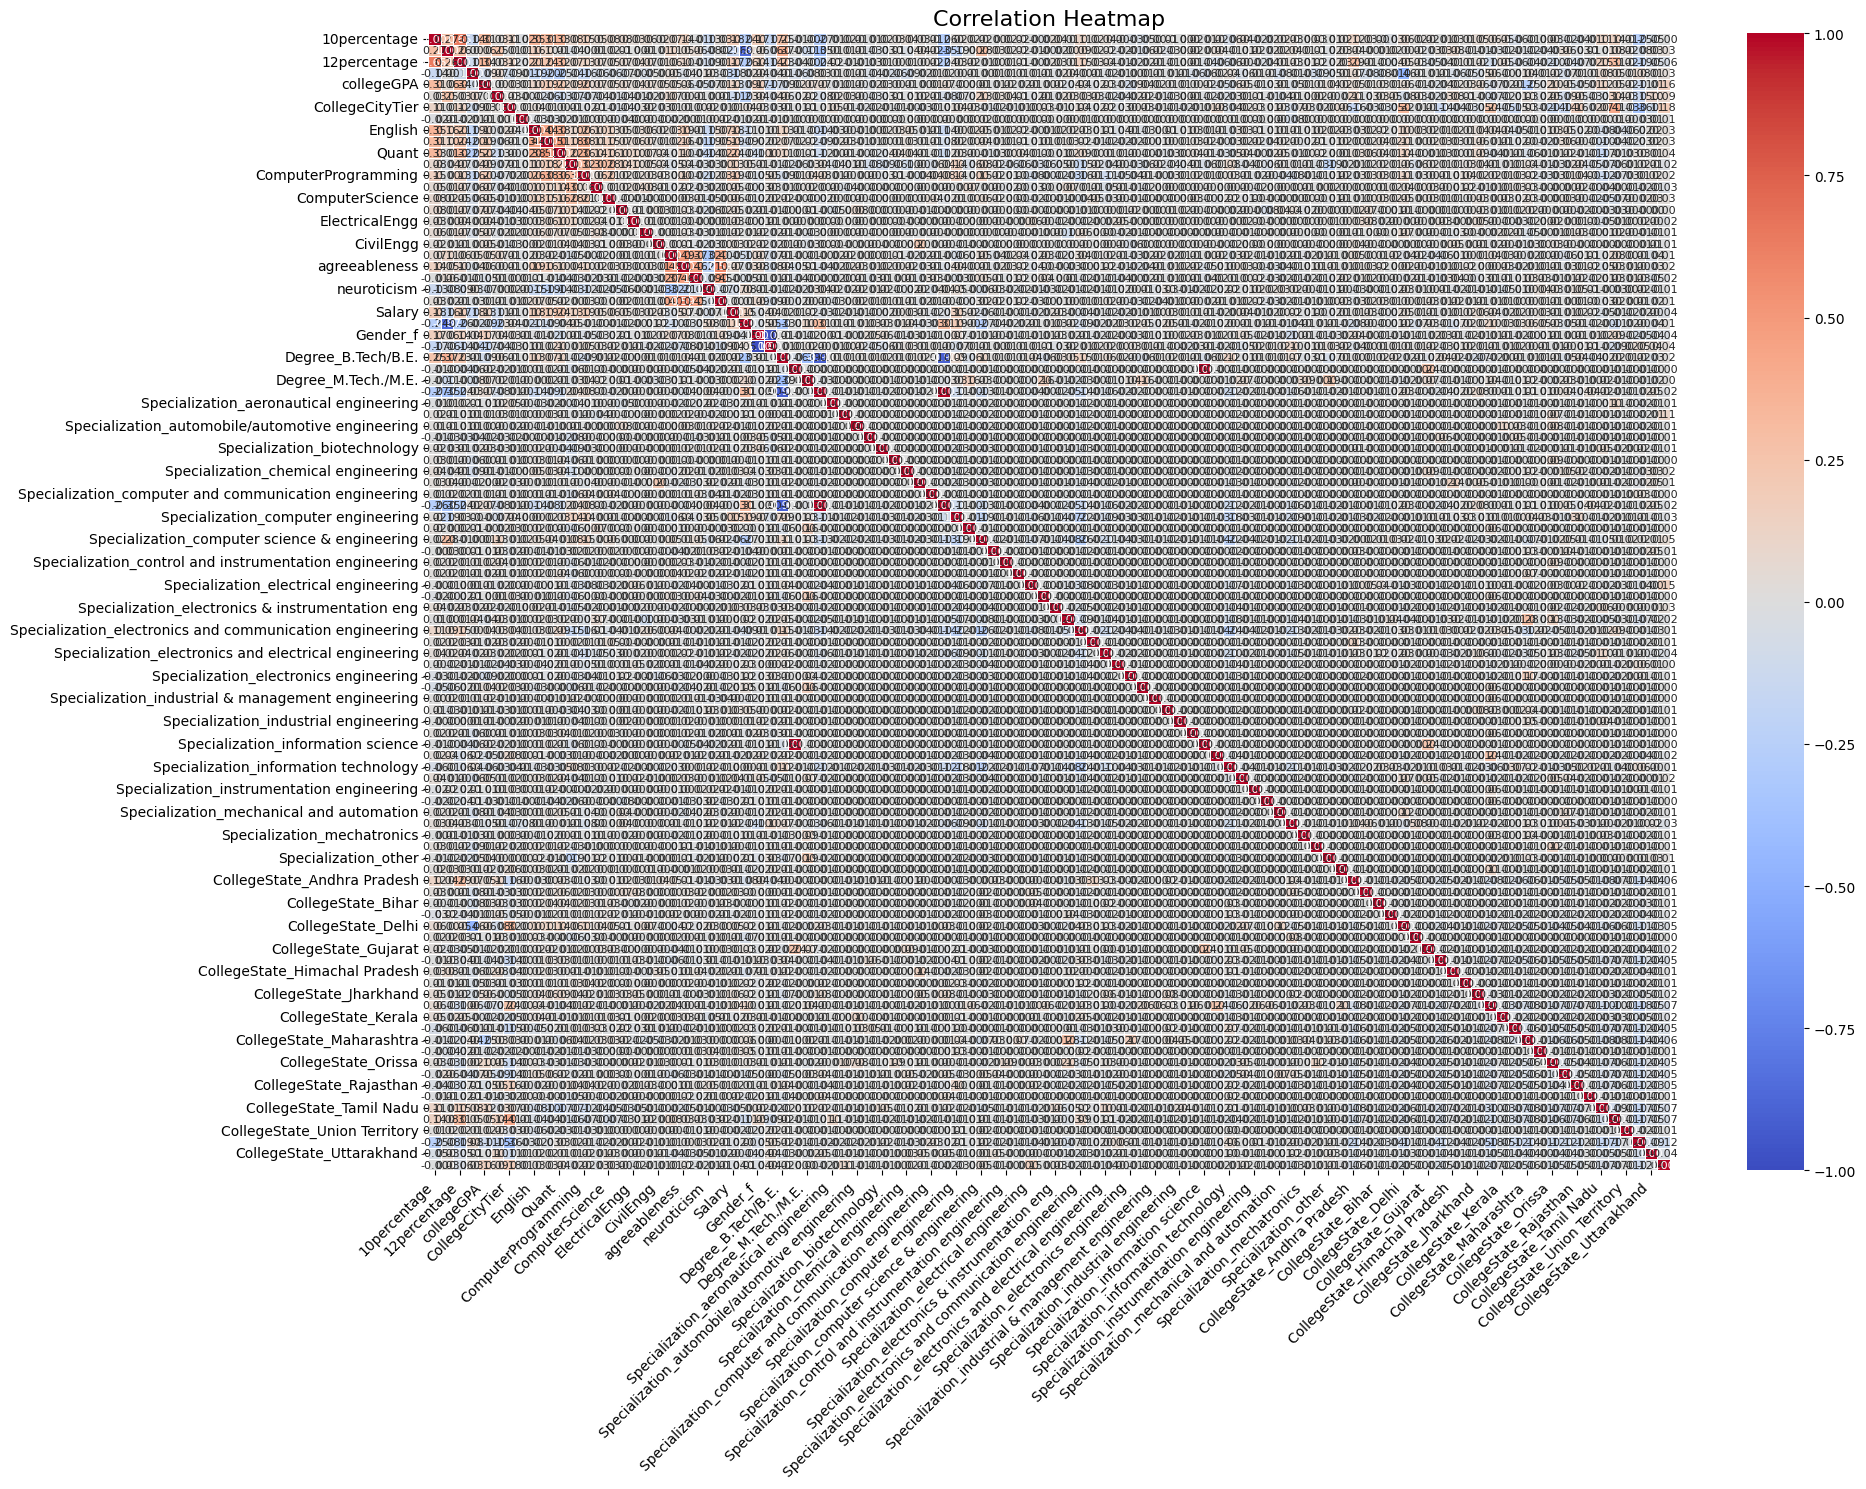

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))  # Increased figure size
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}) # Adjusted annot size
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10) # Adjusted xticks fontsize
plt.yticks(rotation=0, fontsize=10) # Adjusted yticks fontsize
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Boxplot: Salary vs CollegeTier
plt.figure(figsize=(10, 5))
sns.boxplot(x='CollegeTier', y='Salary', data=df)
plt.title('Salary Distribution by College Tier')
plt.show()


# 3. Scatterplot: GPA vs Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(x='collegeGPA', y='Salary', data=df)
plt.title('College GPA vs Salary')
plt.show()

# 4. Scatterplot: Quant vs Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Quant', y='Salary', data=df)
plt.title('Quant Score vs Salary')
plt.show()

# 5. Pairplot: Key numeric features
sns.pairplot(df[['Salary', 'collegeGPA', 'Quant', 'Logical', 'English']])
plt.show()

# 6. Violin Plot: Salary vs Domain
plt.figure(figsize=(12, 6))
sns.violinplot(x='Domain', y='Salary', data=df)
plt.title('Salary Distribution by Domain')
plt.show()

# 7. Correlation Heatmap
top_corr = df.corr()['Salary'].abs().sort_values(ascending=False).head(11).index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Top Correlated Features with Salary")
plt.show()


In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Salary'], kde=True, bins=30, color='teal')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


In [ ]:
sns.countplot(x='CollegeTier', data=df)
plt.title('Count of Students by College Tier')
plt.show()


In [ ]:
# Find the one-hot encoded specialization columns
specialization_cols = [col for col in df.columns if col.startswith('Specialization_')]

# Calculate the mean salary for each specialization
specialization_salaries = {}
for col in specialization_cols:
    # Filter the DataFrame to include only rows where the specialization is present (value is 1.0)
    temp_df = df[df[col] == 1.0]
    if not temp_df.empty:
        specialization_salaries[col] = temp_df['Salary'].mean()

# Convert the dictionary to a pandas Series and sort by mean salary
specialization_salaries_series = pd.Series(specialization_salaries)
top_specializations = specialization_salaries_series.sort_values(ascending=False).head(10)

# Plot the average salary for the top specializations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_specializations.index, y=top_specializations.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Specialization')
plt.ylabel('Average Salary')
plt.title('Top 10 Specializations by Average Salary')
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

In [ ]:
sns.histplot(df['Salary'], kde=True)
plt.show()

MODELS


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# For demonstration, let's create a binary target variable based on Salary
df['High_Salary'] = (df['Salary'] > df['Salary'].median()).astype(int)

X = df.drop(['Salary', 'High_Salary'], axis=1)
y = df['High_Salary']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize and train a simple classification model
model = LogisticRegression(max_iter=5000) # Increased max_iter for convergence
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.71
F1 Score: 0.67

Confusion Matrix:
[[380 121]
 [138 261]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Define features (X) and target (y)
X = df.drop(['Salary', 'High_Salary'], axis=1)  # Features
y = df['High_Salary']  # Target variable

# Initialize KNN classifier (you can still tune n_neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())

Cross-validation Accuracy Scores: [0.63333333 0.61190476 0.60714286 0.63245823 0.68973747]
Mean Cross-validation Accuracy: 0.6349153312876463


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Split features and target
X = df.drop(['Salary', 'High_Salary'], axis=1)
y = df['High_Salary']

# Step 3: Define parameter grid (try k values from 1 to 20)
param_grid = {'n_neighbors': list(range(1, 21))}

# Step 4: Initialize GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Step 5: Fit to the scaled data
grid.fit(X_train, y_train)

# Step 6: Print best results
print("Best n_neighbors:", grid.best_params_['n_neighbors'])
print("Best cross-validation accuracy:", grid.best_score_)

Best n_neighbors: 15
Best cross-validation accuracy: 0.6606330264802818


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt_model = DecisionTreeClassifier()
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation Accuracy:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-validation Accuracy: [0.64047619 0.64761905 0.61904762 0.62529833 0.64200477]
Mean Accuracy: 0.634889191953631


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(3, 15),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best CV Accuracy: 0.674939197636095


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Initialize and train a Decision Tree classifier with specified parameters
dt_model_tuned = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_model_tuned.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt_tuned = dt_model_tuned.predict(X_test)

# Calculate accuracy and F1 score
accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
f1_dt_tuned = f1_score(y_test, y_pred_dt_tuned)

print(f"Tuned Decision Tree Accuracy: {accuracy_dt_tuned:.2f}")
print(f"Tuned Decision Tree F1 Score: {f1_dt_tuned:.2f}")

Tuned Decision Tree Accuracy: 0.67
Tuned Decision Tree F1 Score: 0.61


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are already defined from previous steps

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())

Cross-validation Accuracy Scores: [0.72619048 0.73095238 0.70238095 0.69212411 0.70883055]
Mean Cross-validation Accuracy: 0.7120956926923514


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30], # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit to the data
grid_rf.fit(X_train, y_train)

# Print best results
print("Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best CV Accuracy for Random Forest:", grid_rf.best_score_)

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best CV Accuracy for Random Forest: 0.7278418002045688


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined from previous steps
# Assuming the data has been split into X_train, X_test, y_train, y_test

# Initialize and train a Random Forest classifier with specified parameters
rf_model_tuned = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_model_tuned.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_tuned = rf_model_tuned.predict(X_test)

# Calculate accuracy and F1 score
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned)

print(f"Tuned Random Forest Accuracy: {accuracy_rf_tuned:.2f}")
print(f"Tuned Random Forest F1 Score: {f1_rf_tuned:.2f}")

Tuned Random Forest Accuracy: 0.71
Tuned Random Forest F1 Score: 0.66


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize SVC model (without feature scaling)
svc_model = SVC(random_state=42)

# Perform 5-fold cross-validation
cv_scores_svc = cross_val_score(svc_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation Accuracy Scores (SVC without scaling):", cv_scores_svc)
print("Mean Cross-validation Accuracy (SVC without scaling):", cv_scores_svc.mean())

Cross-validation Accuracy Scores (SVC without scaling): [0.54761905 0.60238095 0.60714286 0.59665871 0.60381862]
Mean Cross-validation Accuracy (SVC without scaling): 0.5915240368223661


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Assuming X and y are already defined from previous steps

# Initialize Gaussian Naive Bayes classifier
gnb_model = GaussianNB()

# Perform 5-fold cross-validation without scaling
cv_scores_gnb = cross_val_score(gnb_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation Accuracy Scores (Gaussian Naive Bayes without scaling):", cv_scores_gnb)
print("Mean Cross-validation Accuracy (Gaussian Naive Bayes without scaling):", cv_scores_gnb.mean())

Cross-validation Accuracy Scores (Gaussian Naive Bayes without scaling): [0.70714286 0.6952381  0.70238095 0.67541766 0.68257757]
Mean Cross-validation Accuracy (Gaussian Naive Bayes without scaling): 0.6925514262984429


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

# Assuming X and y are already defined from previous steps

# Initialize AdaBoost classifier
adaboost_model = AdaBoostClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores_adaboost = cross_val_score(adaboost_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation Accuracy Scores (AdaBoost):", cv_scores_adaboost)
print("Mean Cross-validation Accuracy (AdaBoost):", cv_scores_adaboost.mean())

Cross-validation Accuracy Scores (AdaBoost): [0.68809524 0.71904762 0.67380952 0.71599045 0.71121718]
Mean Cross-validation Accuracy (AdaBoost): 0.7016320036367769


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Initialize XGBoost classifier
# You might want to tune hyperparameters later for better performance
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Perform 5-fold cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation Accuracy Scores (XGBoost):", cv_scores_xgb)
print("Mean Cross-validation Accuracy (XGBoost):", cv_scores_xgb.mean())

Cross-validation Accuracy Scores (XGBoost): [0.70238095 0.69285714 0.69285714 0.73508353 0.68973747]
Mean Cross-validation Accuracy (XGBoost): 0.7025832480963745


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Initialize Gradient Boosting classifier
# You might want to tune hyperparameters later
gb_model = GradientBoostingClassifier(random_state=42)

# Perform 5-fold cross-validation on scaled data
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation Accuracy Scores (Gradient Boosting):", cv_scores_gb)
print("Mean Cross-validation Accuracy (Gradient Boosting):", cv_scores_gb.mean())

Cross-validation Accuracy Scores (Gradient Boosting): [0.71666667 0.71904762 0.69285714 0.70167064 0.6778043 ]
Mean Cross-validation Accuracy (Gradient Boosting): 0.7016092737811115


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Columns: 101 entries, 10percentage to High_Salary
dtypes: float64(90), int32(1), int64(10)
memory usage: 2.3 MB


**VIF**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Assuming 'df' is your DataFrame and it contains the features
# Exclude the target variable(s) and any identifier columns
X = df.drop(['Salary', 'High_Salary', 'CollegeCityID'], axis=1)

# Drop one column from each set of one-hot encoded variables to avoid perfect multicollinearity
# and drop the constant term as we are adding it back
# We need to ensure these columns exist before dropping
cols_to_drop_onehot = []
if 'Gender_f' in X.columns:
    cols_to_drop_onehot.append('Gender_f')
if 'Degree_B.Tech/B.E.' in X.columns:
    cols_to_drop_onehot.append('Degree_B.Tech/B.E.')
if 'CollegeState_Uttar Pradesh' in X.columns:
    cols_to_drop_onehot.append('CollegeState_Uttar Pradesh')

specialization_cols = [col for col in X.columns if col.startswith('Specialization_')]
if specialization_cols:
  cols_to_drop_onehot.append(specialization_cols[0])

X = X.drop(cols_to_drop_onehot, axis=1, errors='ignore')

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Using a loop to calculate VIF for each feature
# This can take some time with many features
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(X.shape[1])]

# Sort the features by VIF in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print("Variance Inflation Factor (VIF) for Features:\n")
# Set display option to show full float values
with pd.option_context('display.float_format', '{:.2f}'.format):
    print(vif_data)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Variance Inflation Factor (VIF) for Features:

                               feature     VIF
25                Degree_M.Sc. (Tech.)     inf
57  Specialization_information science     inf
1                         12graduation 8738.07
6                       GraduationYear 3029.53
17                           CivilEngg 2631.21
..                                 ...     ...
74                    CollegeState_Goa    1.02
78      CollegeState_Jammu and Kashmir    1.02
91        CollegeState_Union Territory    1.02
88                 CollegeState_Sikkim    1.01
84              CollegeState_Meghalaya    1.01

[94 rows x 2 columns]


In [ ]:
 # Print VIF status line by line
print("Variance Inflation Factor (VIF) Status:")
for index, row in vif_data.iterrows():
    print(f"{row['feature']}: {row['VIF']:.2f}")

Variance Inflation Factor (VIF) Status:
Degree_M.Sc. (Tech.): inf
Specialization_information science: inf
12graduation: 8738.07
GraduationYear: 3029.53
CivilEngg: 2631.21
Age: 554.19
ElectricalEngg: 503.66
MechanicalEngg: 383.82
Specialization_computer application: 273.46
TelecomEngg: 257.95
Specialization_electronics and communication engineering: 228.08
Degree_MCA: 204.88
Specialization_computer science & engineering: 190.41
Specialization_information technology: 172.87
Specialization_computer engineering: 141.93
10percentage: 137.06
12percentage: 121.29
collegeGPA: 119.38
ComputerScience: 104.12
CollegeTier: 82.78
ElectronicsAndSemicon: 72.81
Logical: 56.07
Specialization_mechanical engineering: 53.75
Specialization_electronics and electrical engineering: 51.28
ComputerProgramming: 45.99
English: 34.81
Quant: 34.41
Specialization_electronics & telecommunications: 31.37
Specialization_electrical engineering: 22.44
Specialization_electronics & instrumentation eng: 9.16
Specialization_

In [ ]:
# Remove columns with VIF > 10 (based on previous VIF calculation)
# Let's re-calculate VIF to be sure and then remove
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Exclude the target variable(s) and any identifier columns
X = df.drop(['Salary', 'High_Salary', 'CollegeCityID'], axis=1)

# Drop one column from each set of one-hot encoded variables to avoid perfect multicollinearity
# and drop the constant term as we are adding it back
# We need to ensure these columns exist before dropping
cols_to_drop_onehot = []
if 'Gender_f' in X.columns:
    cols_to_drop_onehot.append('Gender_f')
if 'Degree_B.Tech/B.E.' in X.columns:
    cols_to_drop_onehot.append('Degree_B.Tech/B.E.')
if 'CollegeState_Uttar Pradesh' in X.columns:
    cols_to_drop_onehot.append('CollegeState_Uttar Pradesh')

specialization_cols = [col for col in X.columns if col.startswith('Specialization_')]
if specialization_cols:
  cols_to_drop_onehot.append(specialization_cols[0])

X = X.drop(cols_to_drop_onehot, axis=1, errors='ignore')

# Add a constant term to the features for the VIF calculation
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Using a loop to calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(X.shape[1])]

# Identify columns with VIF > 10 (excluding the constant)
high_vif_cols = vif_data[(vif_data['VIF'] > 10) & (vif_data['feature'] != 'const')]['feature'].tolist()

print("Columns with VIF > 10 to be removed:", high_vif_cols)

# Drop the high VIF columns from the DataFrame
# Make sure to drop them from the original df or create a new one
df_reduced_vif = df.drop(high_vif_cols, axis=1, errors='ignore')

print("\nShape of DataFrame after removing high VIF columns:", df_reduced_vif.shape)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Columns with VIF > 10 to be removed: ['Degree_M.Sc. (Tech.)', 'Degree_MCA', 'Specialization_computer application', 'Specialization_computer engineering', 'Specialization_computer science & engineering', 'Specialization_electrical engineering', 'Specialization_electronics & telecommunications', 'Specialization_electronics and communication engineering', 'Specialization_electronics and electrical engineering', 'Specialization_information science', 'Specialization_information technology', 'Specialization_mechanical engineering']

Shape of DataFrame after removing high VIF columns: (2998, 89)


In [ ]:
df_reduced_vif

,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,...,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal,High_Salary
0,87.80,2009,84.00,1,73.82,6920,1,2013,650,665,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,57.00,2010,64.50,2,65.00,6624,0,2014,440,435,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,77.33,2007,85.17,2,61.94,9084,0,2011,485,475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,84.30,2009,86.00,1,80.40,8195,1,2013,675,620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,82.00,2008,75.00,2,64.30,4889,1,2012,575,495,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,75.00,2005,73.00,2,70.00,1263,1,2010,505,485,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2994,84.00,2008,77.00,2,75.20,9481,0,2012,345,585,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2995,91.40,2006,65.56,2,73.19,547,0,2011,385,425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2996,88.64,2006,65.16,2,74.81,1629,1,2011,465,645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
df_reduced_vif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 89 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   10percentage                                                2998 non-null   float64
 1   12graduation                                                2998 non-null   int64  
 2   12percentage                                                2998 non-null   float64
 3   CollegeTier                                                 2998 non-null   int64  
 4   collegeGPA                                                  2998 non-null   float64
 5   CollegeCityID                                               2998 non-null   int64  
 6   CollegeCityTier                                             2998 non-null   int64  
 7   GraduationYear                                              2998 non-null   int64  
 8 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# For demonstration, let's create a binary target variable based on Salary
df_reduced_vif['High_Salary'] = (df_reduced_vif['Salary'] > df_reduced_vif['Salary'].median()).astype(int)

X = df_reduced_vif.drop(['Salary', 'High_Salary'], axis=1)
y = df_reduced_vif['High_Salary']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize and train a simple classification model
model = LogisticRegression(max_iter=5000) # Increased max_iter for convergence
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.72
F1 Score: 0.68

Confusion Matrix:
[[379 122]
 [133 266]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming 'df' is already loaded and preprocessed with 'High_Salary' column


# Split data into training and testing sets (using the same split as before for consistency)


# Initialize and train a Decision Tree classifier with specified paramet

# Make predictions on the test se

# Calculate accuracy and F1 score



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Step 3: Define parameter grid (try k values from 1 to 20)
param_grid = {'n_neighbors': list(range(1, 21))}

# Step 4: Initialize GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

# Step 6: Print best results
print("Best n_neighbors:", grid.best_params_['n_neighbors'])
print("Best cross-validation accuracy:", grid.best_score_)

Best n_neighbors: 15
Best cross-validation accuracy: 0.6606330264802818


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are already defined from previous steps

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30], # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit to the data
grid_rf.fit(X_train, y_train)

# Print best results
print("Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best CV Accuracy for Random Forest:", grid_rf.best_score_)

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy for Random Forest: 0.7239027216281911


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize SVC model (without feature scaling)
svc_model = SVC(random_state=42)

# Perform 5-fold cross-validation
cv_scores_svc = cross_val_score(svc_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation Accuracy Scores (SVC without scaling):", cv_scores_svc)
print("Mean Cross-validation Accuracy (SVC without scaling):", cv_scores_svc.mean())

Cross-validation Accuracy Scores (SVC without scaling): [0.55889724 0.56390977 0.55527638 0.55778894 0.55527638]
Mean Cross-validation Accuracy (SVC without scaling): 0.5582297452173146


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Assuming X and y are already defined from previous steps

# Initialize Gaussian Naive Bayes classifier
gnb_model = GaussianNB()

# Perform 5-fold cross-validation without scaling
cv_scores_gnb = cross_val_score(gnb_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation Accuracy Scores (Gaussian Naive Bayes without scaling):", cv_scores_gnb)
print("Mean Cross-validation Accuracy (Gaussian Naive Bayes without scaling):", cv_scores_gnb.mean())

Cross-validation Accuracy Scores (Gaussian Naive Bayes without scaling): [0.61654135 0.63157895 0.63065327 0.65577889 0.63567839]
Mean Cross-validation Accuracy (Gaussian Naive Bayes without scaling): 0.6340461707031396


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

# Assuming X and y are already defined from previous steps

# Initialize AdaBoost classifier
adaboost_model = AdaBoostClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores_adaboost = cross_val_score(adaboost_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation Accuracy Scores (AdaBoost):", cv_scores_adaboost)
print("Mean Cross-validation Accuracy (AdaBoost):", cv_scores_adaboost.mean())

Cross-validation Accuracy Scores (AdaBoost): [0.71679198 0.69674185 0.72613065 0.65577889 0.71105528]
Mean Cross-validation Accuracy (AdaBoost): 0.7012997317414138


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Assuming X and y are already defined from previous steps

# Initialize Gradient Boosting classifier
# You might want to tune hyperparameters later
gb_model = GradientBoostingClassifier(random_state=42)

# Perform 5-fold cross-validation on unscaled data
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation Accuracy Scores (Gradient Boosting without scaling):", cv_scores_gb)
print("Mean Cross-validation Accuracy (Gradient Boosting without scaling):", cv_scores_gb.mean())

Cross-validation Accuracy Scores (Gradient Boosting without scaling): [0.70175439 0.71929825 0.72613065 0.68592965 0.74874372]
Mean Cross-validation Accuracy (Gradient Boosting without scaling): 0.7163713303358901


# New section

ANN


In [ ]:
#(70:30)

In [ ]:
import tensorflow as tf

In [ ]:
# Split data into training and testing sets using df_reduced_vif
X_train, X_test, y_train, y_test = train_test_split(df_reduced_vif.drop(['Salary', 'High_Salary'], axis=1), df_reduced_vif['High_Salary'], test_size=0.3, random_state=46)

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# Split data into training and testing sets using df_reduced_vif
X_train, X_test, y_train, y_test = train_test_split(df_reduced_vif.drop(['Salary', 'High_Salary'], axis=1), df_reduced_vif['High_Salary'], test_size=0.3, random_state=46)


# STEP1: Fit the model

history= model.fit(X_train,y_train, epochs= 250)

Epoch 1/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5452 - loss: 54.1259 - precision: 0.4648 - recall: 0.2625
Epoch 2/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5198 - loss: 1.7422 - precision: 0.4771 - recall: 0.5819
Epoch 3/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5615 - loss: 1.0372 - precision: 0.5151 - recall: 0.5989
Epoch 4/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5532 - loss: 0.8425 - precision: 0.5071 - recall: 0.5541
Epoch 5/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5616 - loss: 0.7894 - precision: 0.5157 - recall: 0.5460
Epoch 6/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5585 - loss: 0.7825 - precision: 0.5127 - recall: 0.5471
Epoch 7/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5511 - loss: 0.7760 - precision: 0.5058 - recall: 0.5465
Epoch 8/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5574 - loss: 0.7663 - precision: 0.5121 - recall: 0.5437
Epoch 9/250
63/63 ━━━━━

<Axes: >

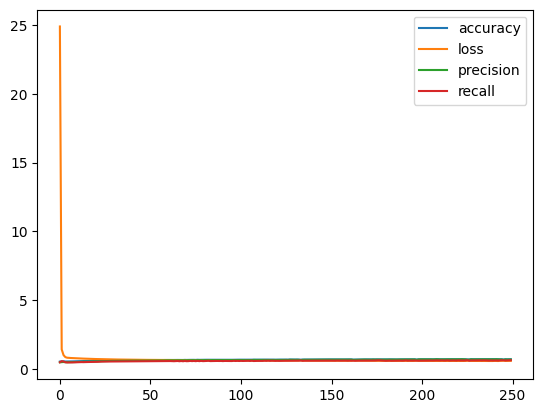

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.summary();

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 7)              │           616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,156 (8.43 KB)

 Trainable params: 718 (2.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,438 (5.62 KB)

In [ ]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7015 - loss: 0.5591 - precision: 0.6479 - recall: 0.7498


[0.5714136958122253,
 0.6947368383407593,
 0.6553288102149963,
 0.7261306643486023]

In [ ]:
#(80:20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_reduced_vif.drop(['Salary', 'High_Salary'], axis=1), df_reduced_vif['High_Salary'], test_size=0.2, random_state=46)

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train, y_train, epochs= 96)

Epoch 1/96
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5611 - loss: 264.1343 - precision: 0.4076 - recall: 0.2322
Epoch 2/96
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4822 - loss: 3.6758 - precision: 0.4481 - recall: 0.7515
Epoch 3/96
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5817 - loss: 1.7254 - precision: 0.5432 - recall: 0.3117
Epoch 4/96
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5957 - loss: 1.1184 - precision: 0.5747 - recall: 0.3147
Epoch 5/96
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6048 - loss: 0.8895 - precision: 0.6006 - recall: 0.3076
Epoch 6/96
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6081 - loss: 0.8257 - precision: 0.6120 - recall: 0.3045
Epoch 7/96
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6003 - loss: 0.7973 - precision: 0.5990 - recall: 0.2795
Epoch 8/96
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5994 - loss: 0.7810 - precision: 0.6040 - recall: 0.2628
Epoch 9/96
72/72 ━━━━━━━━━━━━━

<Axes: >

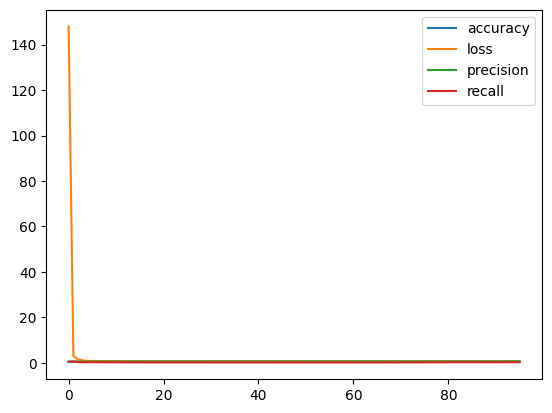

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.summary();

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)               │ (None, 10)             │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,011 (11.77 KB)

 Trainable params: 1,003 (3.92 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,008 (7.85 KB)

In [ ]:
model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6229 - loss: 0.6548 - precision: 0.6870 - recall: 0.2883  


[0.6560013294219971,
 0.6140350699424744,
 0.6585366129875183,
 0.31274130940437317]

In [ ]:
#(60:40)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_reduced_vif.drop(['Salary', 'High_Salary'], axis=1), df_reduced_vif['High_Salary'], test_size=0.4, random_state=46)

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train, y_train, epochs= 125)

Epoch 1/125
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5259 - loss: 16.6149 - precision: 0.4053 - recall: 0.2651
Epoch 2/125
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4347 - loss: 2.7925 - precision: 0.4100 - recall: 0.6044
Epoch 3/125
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4498 - loss: 1.8434 - precision: 0.4324 - recall: 0.7315
Epoch 4/125
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4774 - loss: 1.5359 - precision: 0.4503 - recall: 0.7582
Epoch 5/125
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4936 - loss: 1.2765 - precision: 0.4481 - recall: 0.5778
Epoch 6/125
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5493 - loss: 1.1223 - precision: 0.4896 - recall: 0.1821
Epoch 7/125
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5570 - loss: 1.0016 - precision: 0.5122 - recall: 0.1810
Epoch 8/125
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5609 - loss: 0.8862 - precision: 0.5301 - recall: 0.1575
Epoch 9/125
54/54 ━━━━━

<Axes: >

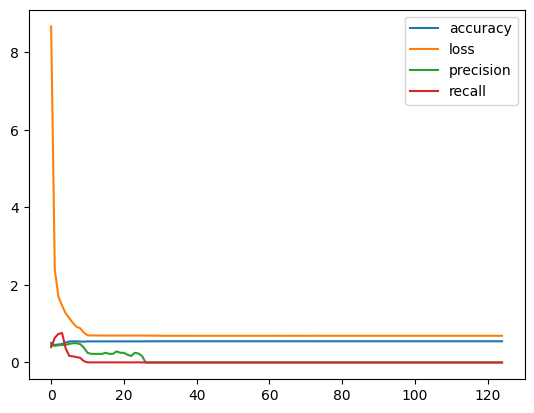

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.summary();

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_104 (Dense)               │ (None, 10)             │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,011 (11.77 KB)

 Trainable params: 1,003 (3.92 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,008 (7.85 KB)

In [ ]:
model.evaluate(X_test, y_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5472 - loss: 0.6886 - precision: 0.0000e+00 - recall: 0.0000e+00


[0.6891401410102844, 0.5443371534347534, 0.0, 0.0]

In [ ]:
#(75:25)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_reduced_vif.drop(['Salary', 'High_Salary'], axis=1), df_reduced_vif['High_Salary'], test_size=0.25, random_state=46)

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train, y_train, epochs= 125)

Epoch 1/125
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5153 - loss: 32.2406 - precision: 0.4357 - recall: 0.2684
Epoch 2/125
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5640 - loss: 2.6906 - precision: 0.5309 - recall: 0.5215
Epoch 3/125
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5528 - loss: 2.2967 - precision: 0.5178 - recall: 0.5305
Epoch 4/125
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5535 - loss: 2.0394 - precision: 0.5182 - recall: 0.5264
Epoch 5/125
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5637 - loss: 1.8475 - precision: 0.5296 - recall: 0.5325
Epoch 6/125
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5736 - loss: 1.6607 - precision: 0.5412 - recall: 0.5430
Epoch 7/125
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5744 - loss: 1.5317 - precision: 0.5428 - recall: 0.5406
Epoch 8/125
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5715 - loss: 1.4283 - precision: 0.5396 - recall: 0.5403
Epoch 9/125
67/67 ━━━━━

<Axes: >

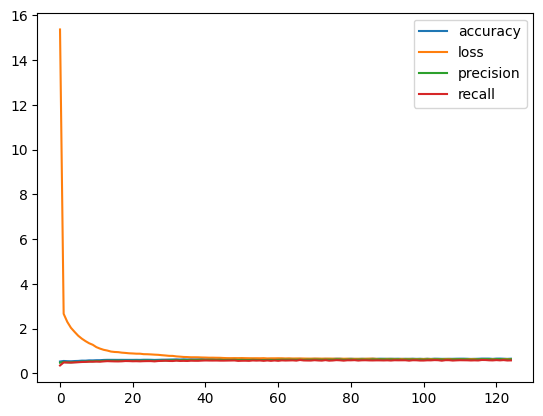

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.summary();


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)               │ (None, 10)             │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,011 (11.77 KB)

 Trainable params: 1,003 (3.92 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,008 (7.85 KB)

In [ ]:
model.evaluate(X_test, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6670 - loss: 0.6676 - precision: 0.7665 - recall: 0.3725  


[0.6811249852180481, 0.648876428604126, 0.7421383857727051, 0.3608562648296356]

In [ ]:

#different hidden layer architecture

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_reduced_vif.drop(['Salary', 'High_Salary'], axis=1), df_reduced_vif['High_Salary'], test_size=0.25, random_state=46)

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(12, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train, y_train, epochs= 75)

Epoch 1/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5100 - loss: 88.4608 - precision: 0.4178 - recall: 0.3604
Epoch 2/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4650 - loss: 0.6942 - precision: 0.4650 - recall: 1.0000
Epoch 3/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4690 - loss: 0.6934 - precision: 0.4653 - recall: 0.9649
Epoch 4/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5350 - loss: 0.6927 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5350 - loss: 0.6921 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5350 - loss: 0.6916 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5350 - loss: 0.6913 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5350 - loss: 0.6910 - precision: 0.0000e+00 - recall: 0.

<Axes: >

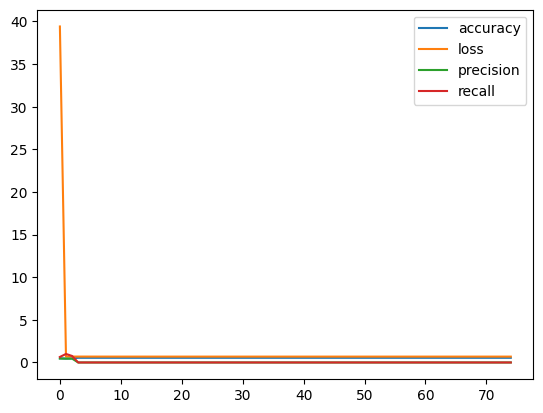

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.summary();

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_112 (Dense)               │ (None, 12)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,605 (14.09 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,404 (9.39 KB)

In [ ]:
model.evaluate(X_test, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5506 - loss: 0.6880 - precision: 0.0000e+00 - recall: 0.0000e+00   


[0.6899427175521851, 0.540730357170105, 0.0, 0.0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_reduced_vif.drop(['Salary', 'High_Salary'], axis=1), df_reduced_vif['High_Salary'], test_size=0.30, random_state=46)

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(70, activation='relu'),  # Hidden layer 1
    tf.keras.layers.Dense(35, activation='relu'),  # Hidden layer 2
    tf.keras.layers.Dense(20, activation='relu'),  # Hidden layer 3
    tf.keras.layers.Dense(10, activation='relu'),  # Hidden layer 4
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history= model.fit(X_train, y_train, epochs= 125)


Epoch 1/125
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5005 - loss: 46.5039 - precision_6: 0.4648 - recall_6: 0.6283
Epoch 2/125
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5337 - loss: 2.3026 - precision_6: 0.4926 - recall_6: 0.7493
Epoch 3/125
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5685 - loss: 1.8771 - precision_6: 0.5450 - recall_6: 0.3132
Epoch 4/125
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5555 - loss: 1.8687 - precision_6: 0.5220 - recall_6: 0.2750
Epoch 5/125
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5387 - loss: 3.3731 - precision_6: 0.4833 - recall_6: 0.2576
Epoch 6/125
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5439 - loss: 2.3413 - precision_6: 0.5027 - recall_6: 0.2181
Epoch 7/125
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5590 - loss: 2.0461 - precision_6: 0.5424 - recall_6: 0.2220
Epoch 8/125
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5356 - loss: 3.4676 - precision_6: 0.4717 - recall_6

In [ ]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5482 - loss: 0.6885 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00


[0.6912750005722046, 0.5345029234886169, 0.0, 0.0]

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(num_features,)),  # Input layer
    tf.keras.layers.Dense(70, activation='relu'),  # Hidden layer 1
    tf.keras.layers.Dense(50, activation='relu'),  # Hidden layer 2
    tf.keras.layers.Dense(35, activation='relu'),  # Hidden layer 3
    tf.keras.layers.Dense(20, activation='relu'),  # Hidden layer 4
    tf.keras.layers.Dense(10, activation='relu'),  # Hidden layer 5
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history= model.fit(X_train, y_train, epochs= 270)



Epoch 1/270
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4975 - loss: 34.6137 - precision_7: 0.4583 - recall_7: 0.5373
Epoch 2/270
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6045 - loss: 1.0462 - precision_7: 0.5653 - recall_7: 0.5816
Epoch 3/270
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5896 - loss: 1.1151 - precision_7: 0.5515 - recall_7: 0.5646
Epoch 4/270
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6035 - loss: 1.0775 - precision_7: 0.5659 - recall_7: 0.5796
Epoch 5/270
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6023 - loss: 1.0318 - precision_7: 0.5660 - recall_7: 0.5698
Epoch 6/270
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6009 - loss: 0.9924 - precision_7: 0.5623 - recall_7: 0.5898
Epoch 7/270
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6130 - loss: 0.9347 - precision_7: 0.5737 - recall_7: 0.6100
Epoch 8/270
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6047 - loss: 0.8863 - precision_7: 0.5670 - recall_7

In [ ]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6981 - loss: 0.5845 - precision_7: 0.6581 - recall_7: 0.6925


[0.6161232590675354,
 0.6818713545799255,
 0.6536585092544556,
 0.6733668446540833]

In [ ]:
import tensorflow as tf

# Build the model
model = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(num_features,)),  # Input layer
    tf.keras.layers.Dense(70, activation='relu'),  # Hidden layer 1
    tf.keras.layers.Dense(60, activation='relu'),  # Hidden layer 2
    tf.keras.layers.Dense(50, activation='relu'),  # Hidden layer 3
    tf.keras.layers.Dense(40, activation='relu'),  # Hidden layer 4
    tf.keras.layers.Dense(30, activation='relu'),  # Hidden layer 5
    tf.keras.layers.Dense(15, activation='relu'),  # Hidden layer 6
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
])

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model for 300 epochs
history= model.fit(X_train, y_train, epochs= 270)


Epoch 1/270
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5263 - loss: 12.4832 - precision_8: 0.4815 - recall_8: 0.4940
Epoch 2/270
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5876 - loss: 1.3002 - precision_8: 0.5467 - recall_8: 0.5754
Epoch 3/270
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5685 - loss: 1.5530 - precision_8: 0.5252 - recall_8: 0.5302
Epoch 4/270
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5402 - loss: 1.1397 - precision_8: 0.4972 - recall_8: 0.4992
Epoch 5/270
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6017 - loss: 0.9581 - precision_8: 0.5626 - recall_8: 0.5591
Epoch 6/270
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5765 - loss: 0.9409 - precision_8: 0.5375 - recall_8: 0.5420
Epoch 7/270
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5791 - loss: 1.3314 - precision_8: 0.5412 - recall_8: 0.5358
Epoch 8/270
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5968 - loss: 0.9135 - precision_8: 0.5596 - recall_8

In [ ]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7217 - loss: 0.6036 - precision_8: 0.6606 - recall_8: 0.7899


[0.6316520571708679,
 0.6970760226249695,
 0.6541019678115845,
 0.7412060499191284]

In [ ]:
import tensorflow as tf

# Build the model
model = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(num_features,)),  # Input layer
    tf.keras.layers.Dense(70, activation='relu'),  # Hidden layer 1
    tf.keras.layers.Dense(60, activation='relu'),  # Hidden layer 2
    tf.keras.layers.Dense(50, activation='relu'),  # Hidden layer 3
    tf.keras.layers.Dense(40, activation='relu'),  # Hidden layer 4
    tf.keras.layers.Dense(30, activation='relu'),  # Hidden layer 5
    tf.keras.layers.Dense(20, activation='relu'),  # Hidden layer 6
    tf.keras.layers.Dense(10, activation='relu'),  # Hidden layer 7
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
])

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history= model.fit(X_train, y_train, epochs= 350)



Epoch 1/350
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5407 - loss: 19.2379 - precision_9: 0.4614 - recall_9: 0.3848
Epoch 2/350
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5838 - loss: 0.8224 - precision_9: 0.5470 - recall_9: 0.5222
Epoch 3/350
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6003 - loss: 0.7827 - precision_9: 0.5623 - recall_9: 0.5693
Epoch 4/350
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5808 - loss: 0.7309 - precision_9: 0.5426 - recall_9: 0.4996
Epoch 5/350
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6084 - loss: 0.7101 - precision_9: 0.5768 - recall_9: 0.5335
Epoch 6/350
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6024 - loss: 0.7113 - precision_9: 0.5689 - recall_9: 0.5244
Epoch 7/350
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6094 - loss: 0.7053 - precision_9: 0.5762 - recall_9: 0.5480
Epoch 8/350
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5901 - loss: 0.7608 - precision_9: 0.5508 - recall_9

In [ ]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6605 - loss: 0.6313 - precision_9: 0.5955 - recall_9: 0.7776


[0.6473734378814697, 0.6514619588851929, 0.59765625, 0.7688442468643188]

In [ ]:
df_reduced_vif.shape

(2847, 89)

In [ ]:
import tensorflow as tf

# Build the model
model = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(num_features,)),  # Input layer
    tf.keras.layers.Dense(70, activation='relu'),  # Hidden layer 1
    tf.keras.layers.Dense(60, activation='tanh'),  # Hidden layer 2
    tf.keras.layers.Dense(50, activation='relu'),  # Hidden layer 3
    tf.keras.layers.Dense(40, activation='tanh'),  # Hidden layer 4
    tf.keras.layers.Dense(30, activation='relu'),  # Hidden layer 5
    tf.keras.layers.Dense(20, activation='tanh'),  # Hidden layer 6
    tf.keras.layers.Dense(10, activation='relu'),  # Hidden layer 7
    tf.keras.layers.Dense(5, activation='tanh'), # Hidden layer 8
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
])

# Compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model for 300 epochs
history= model.fit(X_train, y_train, epochs= 200)

Epoch 1/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5170 - loss: 0.6986 - precision_10: 0.4749 - recall_10: 0.5110
Epoch 2/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5447 - loss: 0.6882 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00
Epoch 3/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5447 - loss: 0.6891 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00
Epoch 4/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5447 - loss: 0.6887 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00
Epoch 5/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5423 - loss: 0.6884 - precision_10: 0.1940 - recall_10: 0.0072
Epoch 6/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5294 - loss: 0.6918 - precision_10: 0.2661 - recall_10: 0.0238
Epoch 7/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5447 - loss: 0.6890 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00
Epoch 8/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5447 - 

In [ ]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5482 - loss: 0.6885 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00


[0.6913326382637024, 0.5345029234886169, 0.0, 0.0]